## Generate the pkl files

Before you start, copy the script in [this script](https://github.com/ramp-kits/supernovae/blob/master/utils/serialize_lsst_sn_sims.py) to your local directory.


Choose a model to validate. In this example, we will work with MODEL01.
Using an environment with Python3, do in the command line

```
>> python serialize_lsst_sn_sims.py <LSST_sim_dir> --timed
```

where <LSST_sim_dir> is the directory where the FITS files for the model you will analyze are located.

In my case that was

```
>> python serialize_lsst_sn_sim.py ../../data/PLASTICC_2018-02-10/LSST_DDF_MODEL01/ --timed
```

This will create in your local directory a file named `LSST_DDF_MODEL01_train.pkl` which will be used from now on as the data source.

## Read the data

The functions bellow will convert the pkl file into pandas data frames

In [1]:
import gzip
import pickle
import pandas as pd
import numpy as np

LSST_FILTERS = 'ugrizY'


def read_data(filename):
    """Read data from pickled file to a pandas dataframe"""
    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)

    X = to_dataframe(data)
    y = pd.get_dummies(X.type == 0, prefix='SNIa', drop_first=True)
    X = X.drop(columns=['type'])

    return X, y


def to_dataframe(data):
    """Converts from a python dictionary to a pandas dataframe"""
    for idx in data:
        sn = data[idx]
        for filt in LSST_FILTERS:
            sn['mjd_%s' % filt] = np.array(sn[filt]['mjd'])
            sn['fluxcal_%s' % filt] = np.array(sn[filt]['fluxcal'])
            sn['fluxcalerr_%s' % filt] = np.array(sn[filt]['fluxcalerr'])
            del sn[filt]
        sn.update(sn['header'])
        del sn['header']

    return pd.DataFrame.from_dict(data, orient='index')

Now you can use the data doing

In [2]:
X, y = read_data('../../data/LSST_DDF_MODEL03_train.pkl')

The `X` contain the data itself. You can take a look at what IDs are present in X by using

In [3]:
print(len(X))
X.index[:100]

2013


Int64Index([   28,   270,   507,   667,   687,   976,  1183,  1351,  1512,
             1552,  2019,  2077,  2378,  2582,  2614,  2669,  2678,  2702,
             2977,  3398,  3637,  3908,  4257,  4793,  4824,  5004,  5152,
             5339,  5375,  5633,  5731,  5875,  6426,  6520,  6606,  6835,
             7010,  7191,  7591,  8069,  8105,  8213,  8266,  8615,  8919,
             9131,  9157,  9202,  9387,  9543,  9773,  9815,  9900,  9952,
            10264, 10913, 11168, 11360, 11783, 11892, 12025, 12525, 12643,
            13080, 13130, 13192, 13218, 13455, 13495, 13596, 13794, 13915,
            14283, 14574, 14650, 14713, 14931, 15583, 15702, 15820, 15864,
            15978, 16018, 16025, 16169, 16394, 16671, 16727, 16848, 17015,
            17040, 17172, 17544, 17555, 17777, 17840, 18045, 18142, 18434,
            18631],
           dtype='int64')

In [4]:
# Get one supernovae - the first in the list
X.iloc[0]

mjd_u                                                          []
fluxcal_u                                                      []
fluxcalerr_u                                                   []
mjd_g           [59947.34, 59957.297, 59962.203, 59973.195, 59...
fluxcal_g       [-3.33932, 2.06329, 2.32591, -1.38489, -0.8653...
fluxcalerr_g    [5.05063, 2.1026, 0.836327, 1.41352, 2.97284, ...
mjd_r           [59947.332, 59957.289, 59962.195, 59973.188, 5...
fluxcal_r       [4.23234, 7.15173, 6.53483, 5.67576, 7.04591, ...
fluxcalerr_r    [1.2481, 1.38063, 0.849012, 1.10197, 1.74477, ...
mjd_i           [59947.348, 59957.305, 59962.211, 59973.203, 5...
fluxcal_i       [10.7487, 9.3277, 9.96154, 8.62918, 7.77436, 6...
fluxcalerr_i    [13.5126, 2.59973, 1.33984, 1.67453, 2.63202, ...
mjd_z           [59947.359, 59957.316, 59962.219, 59973.215, 5...
fluxcal_z       [10.6984, 11.9837, 11.0253, 10.0525, 12.2488, ...
fluxcalerr_z    [8.20703, 3.5438, 1.77998, 1.85937, 3.48095, 2...
mjd_Y     

You can choose one specific SN through its ID. For example, if you wish to access the SN 1618,

In [5]:
X.loc[2702]#1618]


mjd_u                                                          []
fluxcal_u                                                      []
fluxcalerr_u                                                   []
mjd_g           [59770.375, 59779.406, 59782.246, 59797.34, 59...
fluxcal_g       [-1.2112, -6.99261, 0.120795, -1.4026, -5.6559...
fluxcalerr_g    [0.77675, 2.63668, 1.36584, 1.04522, 2.98957, ...
mjd_r           [59779.398, 59782.238, 59797.332, 59800.234, 5...
fluxcal_r       [1.63736, -1.23579, 1.22489, 2.13018, -1.56778...
fluxcalerr_r    [1.78523, 1.24436, 0.972335, 1.76542, 1.11626,...
mjd_i           [59770.383, 59779.414, 59782.254, 59797.348, 5...
fluxcal_i       [2.08306, -2.2365, -2.83509, 2.16079, -0.38719...
fluxcalerr_i    [1.16694, 2.96566, 2.22089, 1.80822, 2.83632, ...
mjd_z           [59770.395, 59779.426, 59782.266, 59797.359, 5...
fluxcal_z       [-0.310957, -6.55585, 0.511383, -1.09657, -3.1...
fluxcalerr_z    [1.79826, 7.04022, 2.46699, 2.57872, 3.65133, ...
mjd_Y     

The y holds the IDs in crescent order

In [7]:
y[:10]
#X

""
28
270
507
667
687
976
1183
1351
1512
1552


## Plotting the Light curves

You can use the utility bellow to plot one (or a few) light curves

In [8]:
#Plot the data
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

LSST_FILTERS = 'ugrizY'

def plot_lightcurves(idx, X):    
    
    flux = []
    for f in LSST_FILTERS:
        if len(X.iloc[idx]['fluxcal_' + f]) > 0:
            flux.append(max(X.iloc[idx]['fluxcal_' + f]))
            
    for id_f, f in enumerate(LSST_FILTERS):
        
        
        ax = axes[id_f // 3, id_f % 3]
        ax.errorbar(X.iloc[idx]['mjd_%s' % f] - X.iloc[idx]['pkmjd'], 
                    X.iloc[idx]['fluxcal_%s' % f]/max(flux), 
                    X.iloc[idx]['fluxcalerr_%s' % f]/max(flux), 
                    fmt='o', alpha=0.5)
        ax.set_xlabel('MJD')
        ax.set_ylabel('Calibrated flux')
        ax.set_title('%s-band' % f)
        
        
def plot_lightcurves_temp(idx, X):    
    
    flux = []
    for f in LSST_FILTERS:
        if len(X.iloc[idx]['fluxcal_' + f]) > 0:
            flux.append(max(X.iloc[idx]['fluxcal_' + f]))
            
    for id_f, f in enumerate(LSST_FILTERS):
        
        
        ax = axes[id_f // 3, id_f % 3]
        ax.errorbar(X.iloc[idx]['mjd_%s' % f] - X.iloc[idx]['pkmjd'], 
                    X.iloc[idx]['fluxcal_%s' % f]/max(flux), 
                    X.iloc[idx]['fluxcalerr_%s' % f]/max(flux), 
                    fmt='-', alpha=0.1, color='black')
        ax.set_xlabel('MJD')
        ax.set_ylabel('Calibrated flux')
        ax.set_title('%s-band' % f)

The functionality bellow will plot light curves in sequence, order by ID

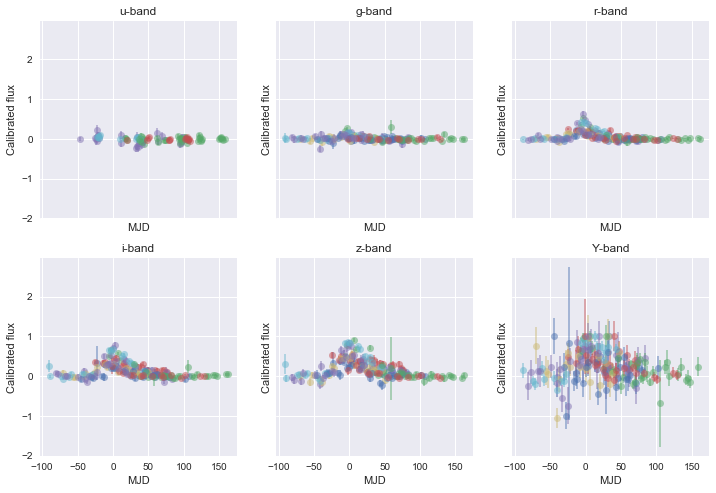

In [9]:
# set the number of light curves to plot
nplots = 10

fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
for i in range(nplots):
    plot_lightcurves(i, X)

If you wish to plot one specific light curve, e.g. again SN 1618,

In [10]:
def plot_lightcurves_id(idx, X):    
    
    flux = []
    for f in LSST_FILTERS:
        #print(len(X.loc[idx]['fluxcal_' + f]), X.loc[idx]['fluxcal_' + f], max(X.loc[idx]['fluxcal_' + f]))
        if len(X.loc[idx]['fluxcal_' + f]) > 0:
            flux.append(max(X.loc[idx]['fluxcal_' + f]))
            
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))        
            
    for id_f, f in enumerate(LSST_FILTERS):
        
        
        ax = axes[id_f // 3, id_f % 3]
        ax.errorbar(X.loc[idx]['mjd_%s' % f] - X.loc[idx]['pkmjd'], # switched second oen from iloc
                    X.loc[idx]['fluxcal_%s' % f]/max(flux), 
                    X.loc[idx]['fluxcalerr_%s' % f]/max(flux), 
                    fmt='o')
        ax.set_xlabel('MJD')
        ax.set_ylabel('Calibrated flux')
        ax.set_title('%s-band' % f)

2013

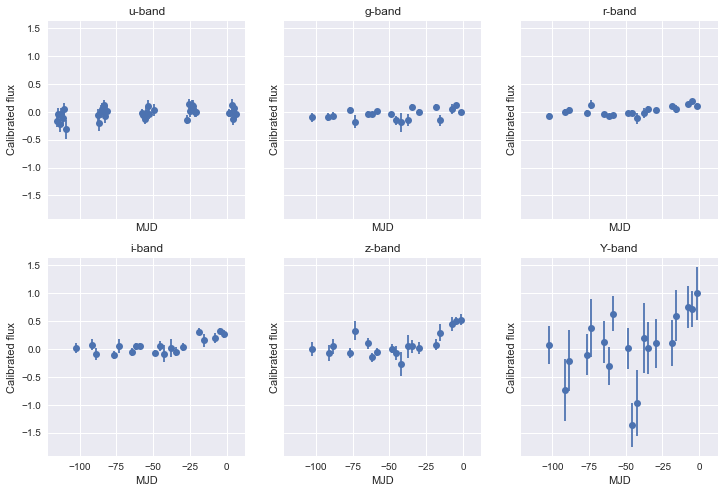

In [11]:
#X.loc[5004]
plot_lightcurves_id(2077, X)
len(X)
#plot_lightcurves_id(5004, X)

In [13]:
z270 = X.z[270]
neighbors_gen = [i for i in range(y.shape[0]) if abs(X.z[y.index[i]] - z270) <= 0.001] #0.001] 
#print(neighbors_gen)

#fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
#for i in neighbors_gen:
#    plot_lightcurves(i, X)

nplots=20


print(len(X)/nplots)
for j in range(100):
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
    for i in range(j*nplots, (j+1)*nplots):
        #plot_lightcurves(i, X)
    #plt.savefig('figs/MODEL03_%s.png'%j)
    #plt.close()


#plot_lightcurves_id(28, X)

## there is an issue with 2702

IndentationError: expected an indented block (<ipython-input-13-6679a52b8c13>, line 18)

## Example of population tests

Bellow are just a few examples I could quickly think of. 
Feel free to add as much as you want

### Flux values

Check the minimum and maximum values for all filters

In [14]:
max_flux = {}
min_flux = {}

# for each filter
for f in LSST_FILTERS:
    max_flux[f] = []
    min_flux[f] = []
    
    # get the flux values
    for indx in range(len(X)):
        if len(X.iloc[indx]['fluxcal_' + f]) > 0:
            max_flux[f].append(max(X.iloc[indx]['fluxcal_' + f]))
            min_flux[f].append(min(X.iloc[indx]['fluxcal_' + f]))                   

After this information is gathered we can check the the distribution of its values

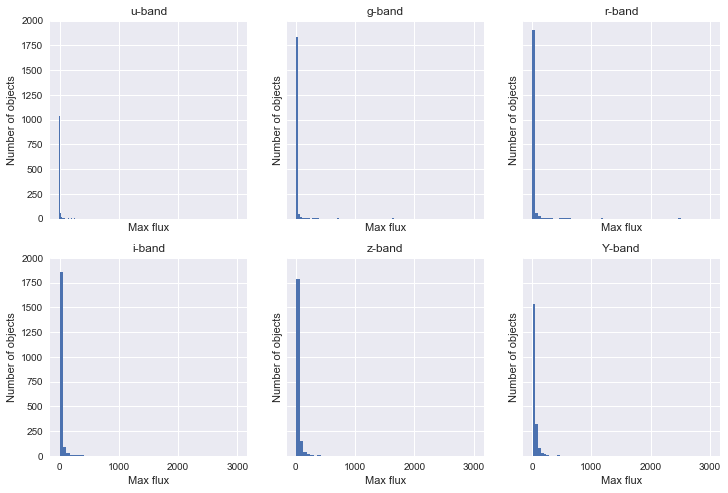

In [15]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))     
for id_f, f in enumerate(LSST_FILTERS):        
    ax = axes[id_f // 3, id_f % 3]
    ax.hist(max_flux[f], bins=50)
    ax.set_xlabel('Max flux')
    ax.set_ylabel('Number of objects')
    ax.set_title('%s-band' % f)

In [16]:
for f in LSST_FILTERS:
    print(max(max_flux[f]))

623.824
1651.3
2506.26
2894.75
3021.08
2342.04


Same thing for minimum values

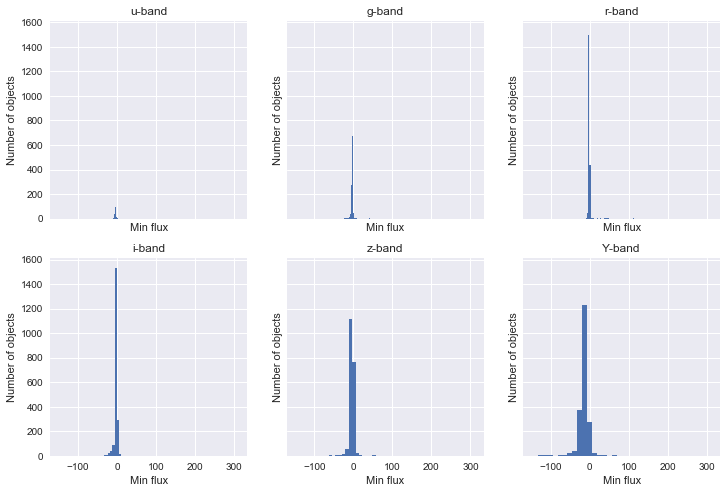

In [17]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))     
for id_f, f in enumerate(LSST_FILTERS):        
    ax = axes[id_f // 3, id_f % 3]
    ax.hist(min_flux[f], bins=40)
    ax.set_xlim(min(min_flux[f]), max(min_flux[f]))
    ax.set_xlabel('Min flux')
    ax.set_ylabel('Number of objects')
    ax.set_title('%s-band' % f)

In [18]:
for f in LSST_FILTERS:
    print(f)
    print('min/max: ', min(min_flux[f]), max(min_flux[f]))
    print('ave/med: ',np.mean(min_flux[f]), np.median(min_flux[f]), '\n')

u
min/max:  -12.7915 1.73063
ave/med:  -4.22544 -4.07801 

g
min/max:  -24.0117 42.7712
ave/med:  -3.0885 -2.62686 

r
min/max:  -10.2783 112.908
ave/med:  -1.58056 -1.72504 

i
min/max:  -39.0145 177.803
ave/med:  -2.93273 -2.73901 

z
min/max:  -115.619 230.726
ave/med:  -3.91627 -3.69568 

Y
min/max:  -170.664 334.139
ave/med:  -14.653 -13.7384 



## Compare with ideal simulations

Using the same procedure we used before, generate the pkl files for the ideal simulations

```
>> python serialize_lsst_sn_sims.py ../../data/IDEAL_2018-02-11/IDEAL_MODEL01/ --timed
```

this will generate a `IDEAL_MODEL01_train.pkl` in your local directory.


You can read the data as before:

In [19]:
X1, y1 = read_data('../../data/IDEAL_MODEL03_train.pkl')

In [20]:
#X1
#y1[:10]

And plot some ID

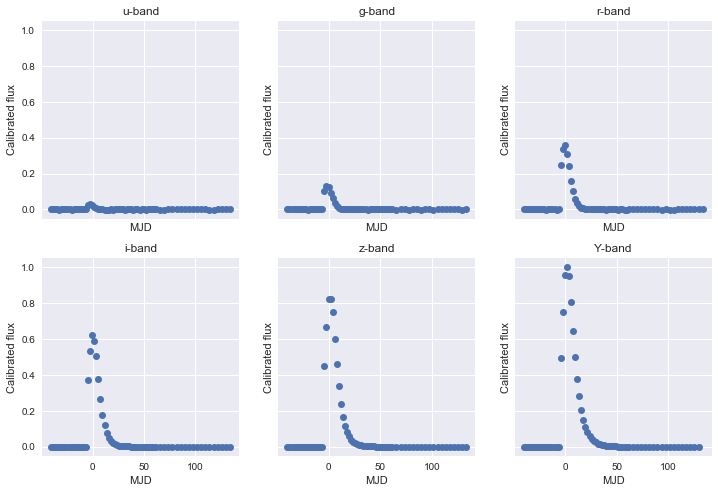

In [21]:
plot_lightcurves_id(380, X1)

Suppose we wish to compare our pet project SN 1618 from the non-ideal simuations. We can check its redshift:

In [22]:
z2702 = X.z[2702]
z2702
#(np.where(X.z < 0.3))
z270 = X.z[270]

now which ideal simulations are close to it in redshift

In [23]:
neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - z270) <= 0.01] #0.001] 
neighbors[:10]

[387, 445, 725, 899, 1208, 1537, 2502, 2908, 2914, 3045]

Plot them all

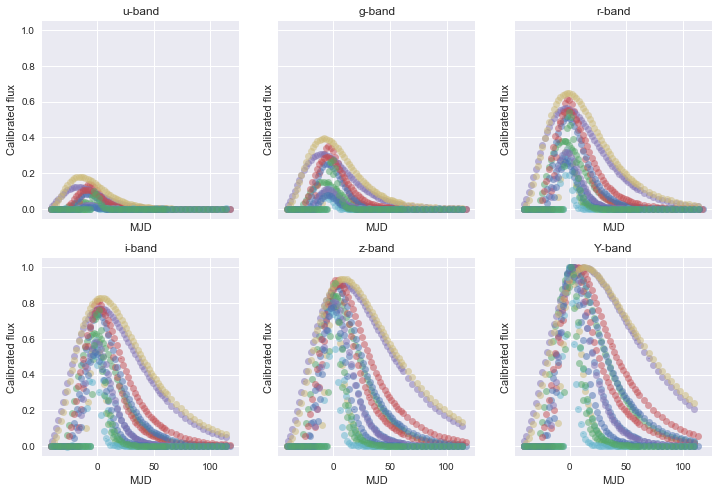

In [25]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
for i in neighbors:
    plot_lightcurves(i, X1)
     

Superimpose the non-ideal light curve.

In [26]:
snid = 270

def plot_lightcurves_ideal_compare(snid, X, neighbors, X1):  
    
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8)) 
    
    for idx in neighbors:
        flux = []
        for f in LSST_FILTERS:
            if len(X1.iloc[idx]['fluxcal_' + f]) > 0:
                flux.append(max(X1.iloc[idx]['fluxcal_' + f]))
   
        for id_f, f in enumerate(LSST_FILTERS):
            ax = axes[id_f // 3, id_f % 3]
            ax.errorbar(X1.iloc[idx]['mjd_%s' % f] - X1.iloc[idx]['pkmjd'], 
                        X1.iloc[idx]['fluxcal_%s' % f]/max(flux), 
                        X1.iloc[idx]['fluxcalerr_%s' % f]/max(flux), 
                        fmt='o')
            ax.set_xlabel('MJD')
            ax.set_ylabel('Calibrated flux')
            ax.set_title('%s-band' % f)
    
    flux2 = []
    for f in LSST_FILTERS:
        if len(X.loc[snid]['fluxcal_' + f]) > 0:
            flux2.append(max(X.loc[snid]['fluxcal_' + f]))
    
    for id_f, f in enumerate(LSST_FILTERS):
        ax = axes[id_f // 3, id_f % 3]
        ax.errorbar(X.loc[snid]['mjd_%s' % f] - X.loc[snid]['pkmjd'], 
                    X.loc[snid]['fluxcal_%s' % f]/max(flux), 
                    X.loc[snid]['fluxcalerr_%s' % f]/max(flux), 
                    fmt='o', color='black')
        ax.set_xlabel('MJD')
        ax.set_ylabel('Calibrated flux')
        ax.set_title('%s-band' % f)

In the plot bellow, the black points corresponto the realistic light curve and the other colors to perfect simulations (high cadence and no noise)

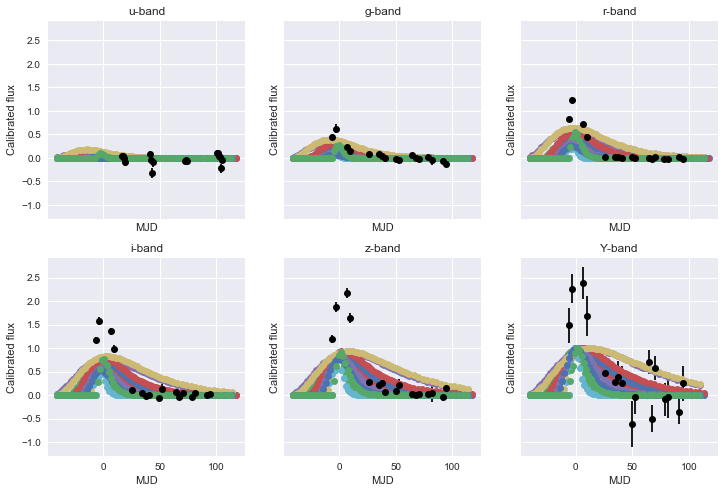

In [27]:
#fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
#for i in neighbors_gen:
#    plot_lightcurves_ideal_compare(i, X, neighbors, X1)
    
plot_lightcurves_ideal_compare(snid, X, neighbors, X1)

In [29]:
for redshift in np.arange(0, 1.5, 0.1):
    if redshift < 0.1:
        idx, = np.where(X.z < 0.1)
        print(redshift, 0.1, len(idx))
        fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
        for i in idx:
            plot_lightcurves(i, X)
        neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - redshift) <= 0.1]
        for n in neighbors:
            plot_lightcurves_temp(n, X1)
        plt.savefig('figs/MODEL03_redshift_%s.png'%redshift)
        plt.close()
    elif redshift > 1.1:
        idx, = np.where((redshift < X.z) & (X.z < redshift + 0.1))
        print(redshift, redshift+0.1, len(idx))
        fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
        neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - redshift) <= 0.1]
        if len(neighbors) > 25:
            neighbors = neighbors[::10]
        for n in neighbors:
            plot_lightcurves_temp(n, X1)
        for i in idx:
            plot_lightcurves(i, X)
        plt.savefig('figs/MODEL03_redshift_%s.png'%redshift)
        plt.close()
    else:
        for nr in np.arange(redshift, redshift+0.1, 0.01):
            idx, = np.where((nr < X.z) & (X.z < nr + 0.01))
            print(nr, nr+0.01, len(idx))
            fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
            neighbors = [i for i in range(y1.shape[0]) if abs(X1.z[y1.index[i]] - nr) <= 0.1]
            if len(neighbors) > 25:
                neighbors = neighbors[::10]
            for n in neighbors:
                plot_lightcurves_temp(n, X1)
            for i in idx:
                plot_lightcurves(i, X)
            plt.savefig('figs/MODEL03_redshift_%s.png'%nr)
            plt.close()

## NOW PLOT THE BASELINE CURVE

0.0 0.1 11
0.1 0.11 2
0.11 0.12 6
0.12 0.13 5
0.13 0.14 6
0.14 0.15 8
0.15 0.16 6
0.16 0.17 7
0.17 0.18 9
0.18 0.19 14
0.19 0.2 18
0.2 0.21 14
0.21 0.22 19
0.22 0.23 24
0.23 0.24 29
0.24 0.25 28
0.25 0.26 30
0.26 0.27 22
0.27 0.28 26
0.28 0.29 35
0.29 0.3 51
0.3 0.31 30
0.3 0.31 30
0.31 0.32 34
0.32 0.33 41
0.33 0.34 28
0.34 0.35 29
0.35 0.36 17
0.36 0.37 23
0.37 0.38 47
0.38 0.39 31
0.39 0.4 43
0.4 0.41 48
0.41 0.42 33
0.42 0.43 27
0.43 0.44 38
0.44 0.45 41
0.45 0.46 34
0.46 0.47 36
0.47 0.48 29
0.48 0.49 30
0.49 0.5 34
0.5 0.51 40
0.51 0.52 34
0.52 0.53 27
0.53 0.54 36
0.54 0.55 28
0.55 0.56 36
0.56 0.57 22
0.57 0.58 29
0.58 0.59 28
0.59 0.6 37
0.6 0.61 26
0.61 0.62 34
0.62 0.63 26
0.63 0.64 28
0.64 0.65 27
0.65 0.66 20
0.66 0.67 28
0.67 0.68 15
0.68 0.69 19
0.69 0.7 22
0.7 0.71 23
0.71 0.72 20
0.72 0.73 15
0.73 0.74 19
0.74 0.75 9
0.75 0.76 17
0.76 0.77 17
0.77 0.78 19
0.78 0.79 15
0.79 0.8 15
0.8 0.81 10
0.81 0.82 13
0.82 0.83 13
0.83 0.84 14
0.84 0.85 10
0.85 0.86 10
0.86 0.87 9
0

In [ ]:
max(X.z)

In [147]:
np.arange(0, 1.5, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4])

In [154]:
np.where((0.1 < X.z) & (X.z < 0.2))

(array([   7,   35,  130,  183,  216,  224,  298,  305,  351,  359,  367,
         381,  388,  398,  445,  459,  467,  489,  501,  526,  567,  621,
         646,  668,  672,  698,  774,  776,  779,  780,  821,  845,  859,
         896,  921,  926,  940,  955,  985,  987,  988,  998, 1018, 1020,
        1023, 1030, 1157, 1158, 1174, 1192, 1201, 1249, 1266, 1329, 1334,
        1354, 1372, 1374, 1397, 1429, 1434, 1457, 1465, 1503, 1513, 1528,
        1538, 1560, 1562, 1587, 1588, 1595, 1599, 1669, 1742, 1773, 1820,
        1847, 1904, 1920, 1991]),)

# Redshift histogram